# Interpolation of the Trajectory of the Asteroid Pallas

Motivated by the discovery of the asteroids Ceres (1801) and Pallas (1802), Carl Friedrich Gauss
studied the computation of planet trajectories in the beginning of the 19th century. There, he
was faced with the following problem of trigonometric interpolation.

## Interpolation of the Asteroid's Trajectory

The following data of the trajectory have been available to Gauss:

<table border="1">
<tr>
    <th> Ascension $\theta$ (in degrees) </th>
    <td> 0 </td>
    <td> 30 </td>
    <td> 60 </td>
    <td> 90 </td>
    <td> 120 </td>
    <td> 150 </td>
    <td> 180 </td>
    <td> 210 </td>
    <td> 240 </td>
    <td> 270 </td>
    <td> 300 </td>
    <td> 330 </td>
</tr>
<tr>
    <th> Declination $X$ (in minutes) </th>
    <td> 408 </td>
    <td> 89 </td>
    <td> -66 </td>
    <td> 10 </td>
    <td> 338 </td>
    <td> 807 </td>
    <td> 1238 </td>
    <td> 1511 </td>
    <td> 1583 </td>
    <td> 1462 </td>
    <td> 1183 </td>
    <td> 804 </td>
</tr>
</table>

Since the declination $X$ is periodic with regard to $\theta$, the given
trajectory data should be interpolated by the following trigonometric function:

\begin{equation}
   X(\theta) = a_0
             + \sum\limits_{k=1}^5 \left(
                    a_k \cos\left( \frac{2\pi k \theta}{360}\right)
                   +b_k \sin\left( \frac{2\pi k \theta}{360}\right)
               \right)
             + a_6 \cos \left( \frac{2\pi \cdot 6 \theta}{360}\right)     
\end{equation}

The data $X_l$ and $\theta_l = 30l$ have to satisfy $X(\theta_l) = X_l$
for all $l = 0,\ldots,11$. Thus,

\begin{equation} \label{eq:interpol}
    X_l = a_0
        + \sum\limits_{k=1}^5 \left(
               a_k \cos\left( \frac{\pi k l}{6}\right)
              +b_k \sin\left( \frac{\pi k l}{6}\right)
          \right)
        + a_6 \cos \left( \pi l \right).     
\end{equation}

## Python Demo

Create a Python script (using IPython Notebook) to compute the
coefficients $a_k$ and $b_k$.
Plot the graph of the interpolated trajectory.

A = 
  1.000  1.000  1.000  1.000  1.000  1.000  1.000
  1.000  0.866  0.500  0.000 -0.500 -0.866 -1.000
  1.000  0.500 -0.500 -1.000 -0.500  0.500  1.000
  1.000  0.000 -1.000 -0.000  1.000  0.000 -1.000
  1.000 -0.500 -0.500  1.000 -0.500 -0.500  1.000
  1.000 -0.866  0.500  0.000 -0.500  0.866 -1.000
  1.000 -1.000  1.000 -1.000  1.000 -1.000  1.000
  1.000 -0.866  0.500 -0.000 -0.500  0.866 -1.000
  1.000 -0.500 -0.500  1.000 -0.500 -0.500  1.000
  1.000 -0.000 -1.000  0.000  1.000  0.000 -1.000
  1.000  0.500 -0.500 -1.000 -0.500  0.500  1.000
  1.000  0.866  0.500  0.000 -0.500 -0.866 -1.000
B = 
  0.000  0.000  0.000  0.000  0.000
  0.500  0.866  1.000  0.866  0.500
  0.866  0.866  0.000 -0.866 -0.866
  1.000  0.000 -1.000 -0.000  1.000
  0.866 -0.866 -0.000  0.866 -0.866
  0.500 -0.866  1.000 -0.866  0.500
  0.000 -0.000  0.000 -0.000  0.000
 -0.500  0.866 -1.000  0.866 -0.500
 -0.866  0.866 -0.000 -0.866  0.866
 -1.000  0.000  1.000 -0.000 -1.000
 -0.866 -0.866  0.000  0.866  

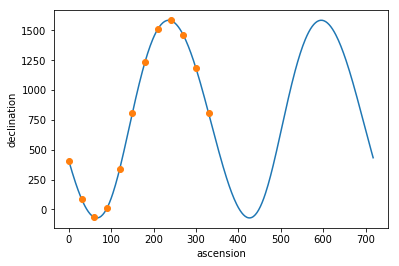

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

X = [408, 89, -66, 10, 338, 807, 1238, 1511, 1583, 1462, 1183, 804]
#X = [0, 89, -66, 10, 338, 807, 0, -807, -338, -10, 66, -89]
#X = [50, 89, -66, 10, 338, 807, 22, 807, 338, 10, -66, 89]

# find coefficients for interpolation function
A = np.array([[math.cos(math.pi*k*l/6) for k in range(0,7)] for l in range(0,12)])
B = np.array([[math.sin(math.pi*k*l/6) for k in range(1,6)] for l in range(0,12)])

M = np.concatenate([A,B], axis=1);

#print "A = " + str(A)
print ("A = ")
for Ai in A:
    print ('%s' % ''.join(['%7.3f' % Aij for Aij in Ai]))
    
#print "B = " + str(B)
print ("B = ")
for Bi in B:
    print ('%s' % ''.join(['%7.3f' % Bij for Bij in Bi]))

#print "M = " + str(M)
print ("M = ")
for Mi in M:
    print ('%s' % ''.join(['%7.3f' % Mij for Mij in Mi]))

#solve the system to get ab
ab = np.linalg.solve(M,X)
#separate a and b
a = ab[0:7];
b = ab[7:12];

print ("a:", a)
print ("b:", b)

#generate interpolation point
def Xint_gen(a,b,t):
    return np.sum(np.array([a[k]*math.cos(math.pi*k*t/180) for k in range(0,7)])) + \
        np.sum(np.array([b[k-1]*math.sin(math.pi*k*t/180) for k in range(1,6)]))
        

# plotting interpolation results and initial data
resolution = 2
plt.plot(range(0,720,resolution), [Xint_gen(a,b,t) for t in range(0,720,resolution)])
plt.plot(range(0,360,30), X, 'o')
plt.xlabel('ascension')
plt.ylabel('declination')
plt.show()

## Exercise 1

Show that the interpolation problem in the previously used interpolation equation is equivalent to

\begin{equation} \label{eq:complinter}
    X_l = \sum\limits_{k=-5}^6 c_k e^{i2\pi kl/12},
\end{equation}

if for $k=1,\ldots,5$ $a_k$ and $b_k$ are chosen as $a_k = 2\mathrm{Re}(\{c_k\})$
and $b_k = -2\mathrm{Im}(\{c_k\})$, while $c_0 = a_0$ and $c_6 = a_6$.

Use the fact that all $X_l \in \mathbb{R}$ and, thus, that $c_{-k} = c_k^*$.

## Python Demo

The equation from Excercise 1 also results from an interpolation problem
with the complex interpolation function
\begin{equation}
    C(x) = \sum\limits_{k=-5}^6 c_k e^{ikx}
\end{equation}
and the supporting points $x_n = 2\pi n/N$.

Use Python to compute and plot the interpolation function $C(x)$. Use the $a_k$ and $b_k$
from Excercise 1 and construct the $C_k$ for all $k=-\frac{N}{2}+1,\ldots, \frac{N}{2}$.

Can $C(x)$ be used to describe the asteroid's trajectory?

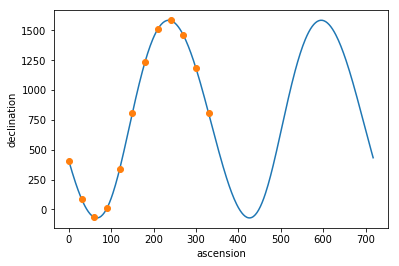

In [5]:
#Note: we are in the same python environment as the previous python demo so X is still defined
import cmath

#compute c_k using the IDFT formula, only the c_k with k>=0 are required
c = np.array([np.sum([X[l]*cmath.exp(-2*math.pi*k*l*1J/12)/12 for l in range(0,12)]) for k in range(0,7)])

#compute a and b coefficients using the formula from exercise 1
aFromC = c.real
aFromC[1:6] = np.product([[2],aFromC[1:6]])
bFromC = np.product([[-2],c[1:6].imag])

# plotting interpolation results and initial data (reuse previously defined X_int_gen)
plt.plot(range(0,720,resolution), [Xint_gen(aFromC,bFromC,t) for t in range(0,720,resolution)])
plt.plot(range(0,360,30), X, 'o');
plt.xlabel('ascension')
plt.ylabel('declination')
plt.show()

## Small Dictionary of Astronomy

<b> Declination </b>

   The angle between the celestial object and the celestial equator (projection
   of the earth equator on the celestial sphere).

<b> Ascension </b>

   The angle between the First Point of Aries (The point where the ecliptic intersects
   the celestial equator) and the intersection point of the meridian of a celestial object
   and the celestial equator. It is equvalent to the geographical longitude but is
   measured to the east on the celestial equator. The units are usually hours, minutes
   and seconds, where 24 hours are equal to 360$^\circ$.


## Exercise 2

The functions $\cos$ and $\sin$ are axially respectively point symmetric to the
ascension of 180 degrees. What can be found for the coefficients $a_k$
and $b_k$ from the last exercise, if the following conditions hold:

\begin{eqnarray*}
    X_l = X(\theta_l) &=&  X(360-\theta_l) = X_{12-l} \qquad \mbox{respectively}\\
    X_l = X(\theta_l) &=&  -X(360-\theta_l) = -X_{12-l}
\end{eqnarray*}

Hint: Which values are allowed for $X_0$ and $X_6$ in the case $X_l = -X_{12-l}$?